<a href="https://colab.research.google.com/github/shrii-varsha/MachineLearningModels/blob/main/Heart_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploadfile = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [6]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [7]:
df.drop(['id'], axis=1, inplace=True)

In [8]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [9]:
col = df.select_dtypes(include=np.number).columns
col

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

<Figure size 400x300 with 0 Axes>

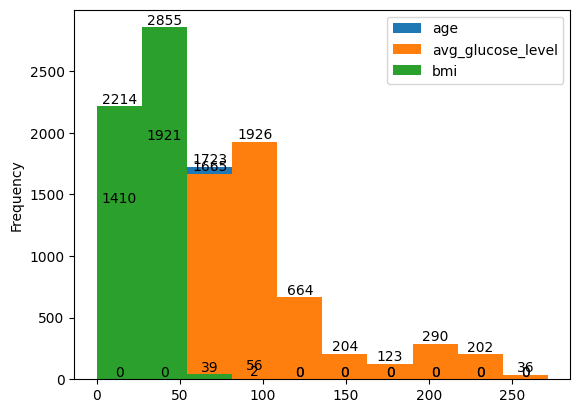

<Figure size 400x300 with 0 Axes>

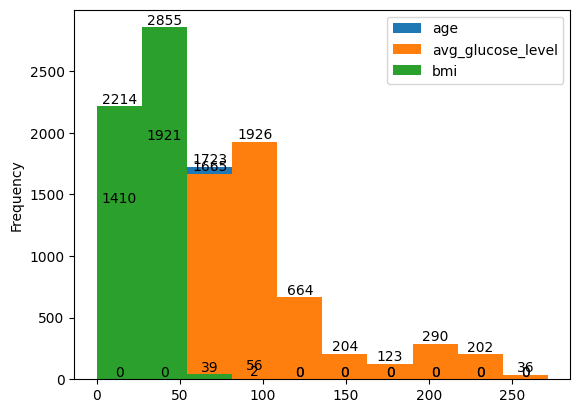

<Figure size 400x300 with 0 Axes>

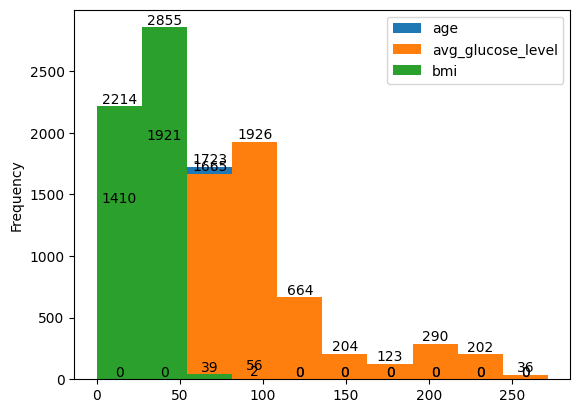

In [10]:
col = ['age', 'avg_glucose_level','bmi']
for i in col:
  plt.figure(figsize=(4,3))
  ax = df[col].plot(kind='hist')
  for i in ax.containers:
    ax.bar_label(i)
  plt.show()

In [11]:
col = df.select_dtypes(include=np.number).columns
col
cor_matrix = df[col].corr()
cor_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<Axes: >

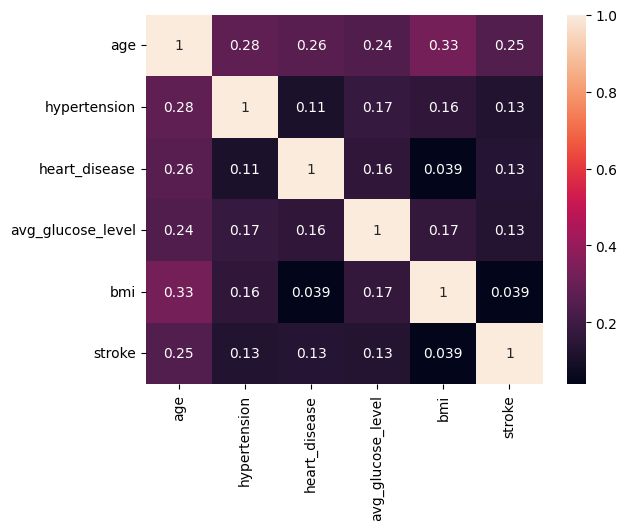

In [12]:
sns.heatmap(cor_matrix, annot=True)

In [13]:
stroke_counts = df['stroke'].value_counts()
stroke_counts

,count
stroke,
0,4861
1,249


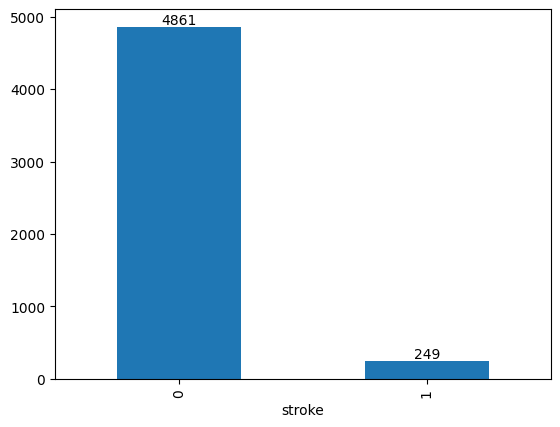

In [14]:
g = df.stroke.value_counts().plot(kind='bar')
for i in g.containers:
  g.bar_label(i)

In [15]:
stroke_df = df[df['stroke'] == 1]
no_stroke =df[df['stroke'] == 0]
no_stroke.shape

(4861, 11)

Selecting 300 samples from **no_stroke** for Balancing

In [16]:
no_stroke_sample = no_stroke.sample(n=300)
no_stroke_sample.shape

(300, 11)

In [17]:
df = pd.concat([stroke_df,no_stroke_sample])
df.shape

(549, 11)

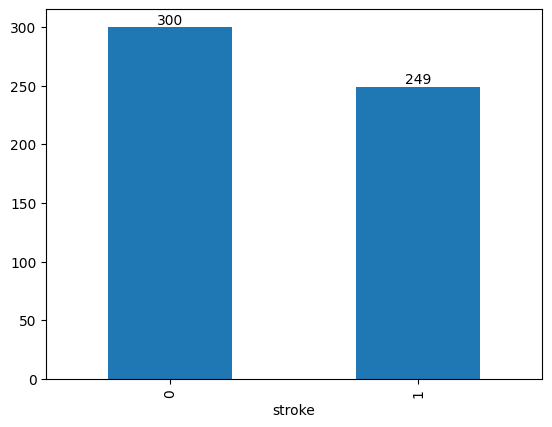

In [18]:
g = df.stroke.value_counts().plot(kind='bar')
for i in g.containers:
  g.bar_label(i)

In [19]:
from sklearn.preprocessing import LabelEncoder

label_mappings = {}
for col_name in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col_name] = le.fit_transform(df[col_name])
    label_mappings[col_name] = dict(zip(le.classes_, le.transform(le.classes_)))


for col, mapping in label_mappings.items():
    print(f"{col}: {mapping}")


gender: {'Female': np.int64(0), 'Male': np.int64(1)}
ever_married: {'No': np.int64(0), 'Yes': np.int64(1)}
work_type: {'Govt_job': np.int64(0), 'Never_worked': np.int64(1), 'Private': np.int64(2), 'Self-employed': np.int64(3), 'children': np.int64(4)}
Residence_type: {'Rural': np.int64(0), 'Urban': np.int64(1)}
smoking_status: {'Unknown': np.int64(0), 'formerly smoked': np.int64(1), 'never smoked': np.int64(2), 'smokes': np.int64(3)}


In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['age'] = scaler.fit_transform(df['age'].values.reshape(-1, 1))
df['avg_glucose_level'] = scaler.fit_transform(df['avg_glucose_level'].values.reshape(-1, 1))
df['bmi'] = scaler.fit_transform(df['bmi'].values.reshape(-1, 1))

df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.601059,0,1,1,2,1,2.045741,1.088139,1,1
1,0,0.338271,0,0,1,3,0,1.557219,-0.043178,2,1
2,1,1.170433,0,1,1,2,0,-0.219207,0.486278,2,1
3,0,-0.187306,0,0,1,2,1,0.985678,0.765189,3,1
4,0,1.126635,1,0,1,3,0,1.038995,-0.761483,2,1


In [22]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((439, 10), (110, 10))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

0.7454545454545455
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        52
           1       0.75      0.78      0.76        58

    accuracy                           0.75       110
   macro avg       0.74      0.74      0.74       110
weighted avg       0.75      0.75      0.75       110

[[37 15]
 [13 45]]


<Axes: >

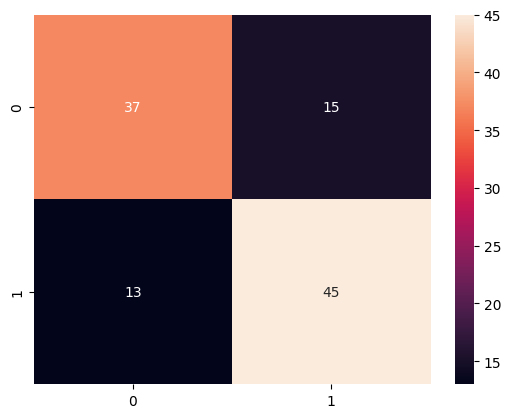

In [26]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [28]:
acc_list = []
model_name=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)
    model_name.append(model.__class__.__name__)

In [29]:
model_df = pd.DataFrame({'Model': model_name, 'Accuracy': acc_list})
model_df

,Model,Accuracy
0,LogisticRegression,0.745455
1,DecisionTreeClassifier,0.636364
2,RandomForestClassifier,0.763636
3,SVC,0.718182
4,KNeighborsClassifier,0.709091
5,GaussianNB,0.727273


In [30]:
from sklearn.model_selection import cross_val_score
feature =X
labels = y
acc_list = []
modelName=[]
for name, model in models.items():
  model_name = model.__class__.__name__
  scores = cross_val_score(model, feature, labels, cv=5, scoring='accuracy')
  acc_list.append(scores.mean())
  modelName.append(model_name)

In [31]:
model_df = pd.DataFrame({'Model': modelName, 'Accuracy': acc_list})
model_df

,Model,Accuracy
0,LogisticRegression,0.763169
1,DecisionTreeClassifier,0.653878
2,RandomForestClassifier,0.748574
3,SVC,0.748590
4,KNeighborsClassifier,0.710325
5,GaussianNB,0.735813


In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 248, 1: 191})
After SMOTE: Counter({0: 248, 1: 248})


In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [35]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization
    'kernel': ['linear', 'rbf'], # Type of separator
    'gamma': [0.01, 0.1, 1]      # For 'rbf' kernel
}

In [36]:
svc = models['Support Vector Machine']
grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [37]:
grid.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

In [38]:
best_svm = SVC(C=0.1, gamma=0.01, kernel='linear')
best_svm.fit(X_train, y_train)
accuracy = cross_val_score(best_svm, feature, labels, cv=5, scoring='accuracy')
accuracy_percent = accuracy.mean() * 100
print(f"Accuracy: {accuracy_percent:.2f}%")


Accuracy: 76.68%


In [39]:
best_svm.fit(X_train, y_train)

SVC(C=0.1, gamma=0.01, kernel='linear')

In [40]:
gender = int(input("Enter gender (Female=0, Male=1): "))
age = float(input("Enter age: "))
age_scale = scaler.fit_transform(np.array(age).reshape(-1, 1))
age = age_scale[0][0]
hypertension = int(input("Hypertension (Yes=1, No=0): "))
heart_disease = int(input("Heart disease (Yes=1, No=0): "))
ever_married = int(input("Ever married (Yes=1, No=0): "))
work_type = int(input("Work type (Govt_job=0, Private=1, Self-employed=2, children=3): "))
residence_type = int(input("Residence type (Rural=0, Urban=1): "))
glucose = float(input("Enter average glucose level: "))
glucose_scale = scaler.fit_transform(np.array(glucose).reshape(-1, 1))
glucose = glucose_scale[0][0]
bmi = float(input("Enter BMI: "))
bmi_scale = scaler.fit_transform(np.array(bmi).reshape(-1, 1))
bmi = bmi_scale[0][0]
smoking_status = int(input("Smoking status (Unknown=0, formerly smoked=1, never smoked=2, smokes=3): "))


Enter gender (Female=0, Male=1): 0
Enter age: 21
Hypertension (Yes=1, No=0): 0
Heart disease (Yes=1, No=0): 0
Ever married (Yes=1, No=0): 0
Work type (Govt_job=0, Private=1, Self-employed=2, children=3): 2
Residence type (Rural=0, Urban=1): 1
Enter average glucose level: 69
Enter BMI: 24
Smoking status (Unknown=0, formerly smoked=1, never smoked=2, smokes=3): 2


In [42]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

patient_data = pd.DataFrame([[gender, age, hypertension, heart_disease, ever_married,
                              work_type, residence_type, glucose, bmi, smoking_status]],
                            columns=columns)
prediction = best_svm.predict(patient_data)

if prediction[0] == 1:
    print("High Risk: Stroke Detected")
else:
    print("Low Risk: No Stroke Detected")

Low Risk: No Stroke Detected
